## Importing libraries

In [354]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import plot_confusion_matrix as plt_conf
from sklearn.model_selection import train_test_split as trn
from sklearn.preprocessing import LabelEncoder
!pwd

/Users/gursi/Desktop/ML


## Reading data

In [316]:
df = pd.read_csv("./datasets/titanic_train.csv")

In [317]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [318]:
cdf = df[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch","Cabin"]].copy()

In [319]:
cdf.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin
0,0,3,male,22.0,1,0,NaN
1,1,1,female,38.0,1,0,C85
2,1,3,female,26.0,0,0,NaN
3,1,1,female,35.0,1,0,C123
4,0,3,male,35.0,0,0,NaN
5,0,3,male,NaN,0,0,NaN
6,0,1,male,54.0,0,0,E46
7,0,3,male,2.0,3,1,NaN
8,1,3,female,27.0,0,2,NaN
9,1,2,female,14.0,1,0,NaN


## Replacing NaN values with mean 

In [320]:
age_array = np.array(cdf.Age)
avg = np.mean(np.nan_to_num(age_array))

In [321]:
cdf["Age"] = cdf["Age"].replace(np.nan, avg)
cdf["Cabin"] = cdf["Cabin"].replace(np.nan, "0")

In [322]:
cdf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin
0,0,3,male,22.0,1,0,0
1,1,1,female,38.0,1,0,C85
2,1,3,female,26.0,0,0,0
3,1,1,female,35.0,1,0,C123
4,0,3,male,35.0,0,0,0


## Changing cabin values so they only show letter

In [323]:
cabin_array = np.array(cdf.Cabin)
for pos in range(0, len(cabin_array)):
    if cabin_array[pos] != 0 :
        temp_str = cabin_array[pos]
        temp_list = list(temp_str)
        cabin_array[pos] = temp_list[0]

cabin_array[0:50]

array(['0', 'C', '0', 'C', '0', '0', 'E', '0', '0', '0', 'G', 'C', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', 'D', '0', 'A', '0', '0',
       '0', 'C', '0', '0', '0', 'B', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'],
      dtype=object)

In [324]:
cdf = cdf.drop("Cabin", axis="columns")
cdf["cabin"] = cabin_array
cdf.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,cabin
0,0,3,male,22.000000,1,0,0
1,1,1,female,38.000000,1,0,C
2,1,3,female,26.000000,0,0,0
3,1,1,female,35.000000,1,0,C
4,0,3,male,35.000000,0,0,0
5,0,3,male,23.799293,0,0,0
6,0,1,male,54.000000,0,0,E
7,0,3,male,2.000000,3,1,0
8,1,3,female,27.000000,0,2,0
9,1,2,female,14.000000,1,0,0


## Converting categorical to numerical data

In [325]:
sex_encode = LabelEncoder()
sex_labels = sex_encode.fit_transform(cdf.Sex)
sex_labels[0:10]

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0])

In [326]:
cdf = cdf.drop("Sex", axis="columns")
cdf["sex"] = sex_labels

In [327]:
cabin_encode = LabelEncoder()
cabin_labels = cabin_encode.fit_transform(cdf.cabin)
cabin_labels[0:50]

array([0, 3, 0, 3, 0, 0, 5, 0, 0, 0, 7, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4,
       0, 1, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [328]:
cdf = cdf.drop("cabin",axis="columns")
cdf['cabins'] = cabin_labels
cdf.head(10)

,Survived,Pclass,Age,SibSp,Parch,sex,cabins
0,0,3,22.000000,1,0,1,0
1,1,1,38.000000,1,0,0,3
2,1,3,26.000000,0,0,0,0
3,1,1,35.000000,1,0,0,3
4,0,3,35.000000,0,0,1,0
5,0,3,23.799293,0,0,1,0
6,0,1,54.000000,0,0,1,5
7,0,3,2.000000,3,1,1,0
8,1,3,27.000000,0,2,0,0
9,1,2,14.000000,1,0,0,0


In [329]:
cdf.describe()

,Survived,Pclass,Age,SibSp,Parch,sex,cabins
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,28.527099,0.523008,0.381594,0.647587,0.776655
std,0.486592,0.836071,13.213618,1.102743,0.806057,0.477990,1.590899
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,24.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,1.000000,8.000000


## Train test split

In [330]:
x = np.array(cdf[["Pclass","Age","SibSp","sex"]], ndmin=2)
y = np.array(cdf[["Survived"]])
y = y.reshape(len(y))

In [331]:
train_x, test_x, train_y, test_y = trn(x, y, test_size = 0.2, random_state = 4)

## Testing model accuracy for different values of K

In [332]:
ks = 10
acc_arr = []

for i in range(1,ks):
    model = kNN(n_neighbors=i)
    model.fit(train_x, train_y)
    score = acc(test_y, model.predict(test_x))
    acc_arr.append(score)
    
acc_arr = np.array(acc_arr)
acc_arr

array([0.81564246, 0.79329609, 0.81564246, 0.77653631, 0.82122905,
       0.81005587, 0.81564246, 0.84916201, 0.83798883])

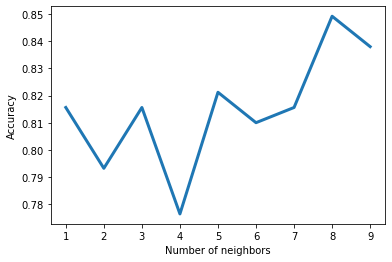

In [333]:
plt.plot(range(1,ks), acc_arr, linewidth=3)
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.show()

In [334]:
ideal = acc_arr.argmax() + 1
print("The highest accuracy of %.3f" %acc_arr.max(), "was with", ideal, "neighbors")

The highest accuracy of 0.849 was with 8 neighbors


## Making final model

In [335]:
final_model = kNN(n_neighbors = ideal)
final_model.fit(x, y)

KNeighborsClassifier(n_neighbors=8)

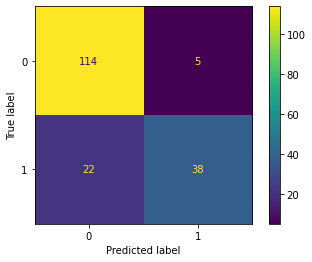

In [336]:
plt_conf(final_model, test_x, test_y)
plt.show()

## Importing test dataset

In [337]:
test = pd.read_csv("./datasets/titanic_test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [338]:
test_data = test[["Pclass","Sex","Age","SibSp","Parch","Cabin"]].copy()
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Cabin
0,3,male,34.5,0,0,NaN
1,3,female,47.0,1,0,NaN
2,2,male,62.0,0,0,NaN
3,3,male,27.0,0,0,NaN
4,3,female,22.0,1,1,NaN


In [339]:
sexlabels = sex_encode.fit_transform(test_data.Sex)
sexlabels[0:10]

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1])

In [340]:
test_data = test_data.drop("Sex", axis="columns")
test_data['sex'] = sexlabels
test_data.head()

,Pclass,Age,SibSp,Parch,Cabin,sex
0,3,34.5,0,0,NaN,1
1,3,47.0,1,0,NaN,0
2,2,62.0,0,0,NaN,1
3,3,27.0,0,0,NaN,1
4,3,22.0,1,1,NaN,0


In [341]:
ages = np.array(test_data.Age)
avg2 = np.mean(np.nan_to_num(ages))
test_data["Age"] = test_data["Age"].fillna(avg2)

In [342]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Age     418 non-null    float64
 2   SibSp   418 non-null    int64  
 3   Parch   418 non-null    int64  
 4   Cabin   91 non-null     object 
 5   sex     418 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 19.7+ KB


In [343]:
test_data["Cabin"] = test_data["Cabin"].replace(np.nan, "0")

In [344]:
temp_cabin = np.array(test_data.Cabin)
for var in range(0,len(temp_cabin)):
    if temp_cabin[var] != 0 :
        temp_listt = list(temp_cabin[var])
        answer = temp_listt[0]
        temp_cabin[var] = answer
temp_cabin[0:50]

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', 'B',
       '0', 'E', '0', '0', '0', '0', '0', '0', '0', '0', '0', 'B', '0',
       'B', '0', 'A', '0', '0', '0', '0', '0', 'C', '0', '0', '0', '0',
       '0', '0', 'D', '0', '0', 'D', '0', 'A', '0', 'D', '0'],
      dtype=object)

In [345]:
test_data = test_data.drop("Cabin", axis="columns")
test_data['tempcabin'] = temp_cabin

In [346]:
test_data.head(10)

,Pclass,Age,SibSp,Parch,sex,tempcabin
0,3,34.5,0,0,1,0
1,3,47.0,1,0,0,0
2,2,62.0,0,0,1,0
3,3,27.0,0,0,1,0
4,3,22.0,1,1,0,0
5,3,14.0,0,0,1,0
6,3,30.0,0,0,0,0
7,2,26.0,1,1,1,0
8,3,18.0,0,0,0,0
9,3,21.0,2,0,1,0


In [347]:
final_cabin = cabin_encode.transform(test_data.tempcabin)
test_data = test_data.drop("tempcabin", axis= "columns")
test_data['finalcabin'] = final_cabin

In [348]:
test_data.head(20)

,Pclass,Age,SibSp,Parch,sex,finalcabin
0,3,34.500000,0,0,1,0
1,3,47.000000,1,0,0,0
2,2,62.000000,0,0,1,0
3,3,27.000000,0,0,1,0
4,3,22.000000,1,1,0,0
5,3,14.000000,0,0,1,0
6,3,30.000000,0,0,0,0
7,2,26.000000,1,1,1,0
8,3,18.000000,0,0,0,0
9,3,21.000000,2,0,1,0


In [349]:
test_data = test_data.drop("finalcabin", axis="columns")
test_data = test_data.drop("Parch", axis="columns")

In [350]:
final_x = np.array(test_data)
final_x

array([[ 3.        , 34.5       ,  0.        ,  1.        ],
       [ 3.        , 47.        ,  1.        ,  0.        ],
       [ 2.        , 62.        ,  0.        ,  1.        ],
       ...,
       [ 3.        , 38.5       ,  0.        ,  1.        ],
       [ 3.        , 24.04425837,  0.        ,  1.        ],
       [ 3.        , 24.04425837,  1.        ,  1.        ]])

In [351]:
predictions = final_model.predict(final_x)
predictions.reshape(len(predictions),1)
predictions[0:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [352]:
finaldf = test[["PassengerId","Pclass"]]
finaldf = finaldf.drop("Pclass", axis = "columns")
finaldf['Survived'] = predictions
finaldf.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,1
6,898,0
7,899,0
8,900,1
9,901,0


In [353]:
#finaldf.to_csv(r"titanic_predictions", index = False)